In [1]:
%matplotlib widget

import ipywidgets as widgets
from ipywidgets import HBox, VBox, jslink, Box
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display, Image
from scipy.integrate import solve_ivp

In [107]:
# Parameter
a = -2
b = 4
tSim = np.linspace(0, 5, 1001)
x0 = [0]
t0 = 1
dt = 2
yd = 2
Kp = 10

In [108]:
# Definition Prozess
def prozess(t, x, u, a, b):
    dx = -a * x[0] + b * u
    return dx

In [109]:
# Definition
def geschlossenerKreis(t, x, a, b, Kp, yr, dyr):
    
    # Regler
    e = x[0] - yr(t)
    u = 1 / b * (dyr(t) - Kp * e + a * x[0])
    
    # Prozess
    dx = prozess(t, x, u, a, b)
    return dx

In [110]:
# Definition Eingangstrajektorie
yr = lambda t: yd * (3 * (t - t0) ** 2 / dt ** 2 - 2 * (t - t0) ** 3 / dt ** 3) if t0 <= t <= t0 + dt else 0 if t < t0 else yd 
dyr = lambda t: yd * (6 * (t - t0) / dt ** 2 - 6 * (t - t0) ** 2 / dt ** 3) if t0 < t < t0 + dt else 0

**Simulation**

In [111]:
resTraj = solve_ivp(geschlossenerKreis,
                    [tSim[0], tSim[-1]],
                    x0,
                    t_eval=tSim, args=(a, b, Kp, yr, dyr))

/tmp/ipykernel_674905/2511041375.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True, gridspec_kw={'height_ratios': [1, 1]})


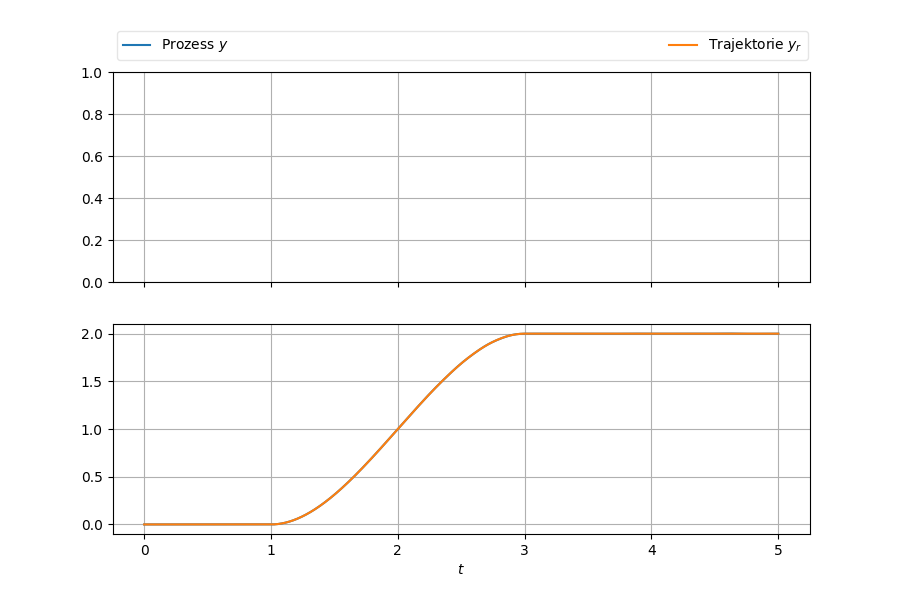

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True, gridspec_kw={'height_ratios': [1, 1]})
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

#ax1.plot(tSim, resSprung.y.T[:, 0], label=r'Prozess $y$')
#ax1.plot(tSim, [uSprung(t) for t in tSim], label=r'Steuerung $u$')

ax2.plot(tSim, resTraj.y.T[:, 0], label=r'Prozess $y$')
ax2.plot(tSim, [yr(t) for t in tSim], label=r'Trajektorie $y_r$')


ax1.grid(); ax2.grid()
ax2.set_xlabel(r"$t$")

handlesAx, labelsAx = ax2.get_legend_handles_labels()
fig.legend([handle for i, handle in enumerate(handlesAx)],
           [label for i, label in enumerate(labelsAx)],
           bbox_to_anchor=(0.13, 0.9, 0.7675, .15), loc=3,
           ncol=2, mode="expand", borderaxespad=0., framealpha=0.5);

In [113]:
# TODO mit Sprung, eventuell mit Steuerung gegebenüberstellen
# Plot mit Fehlerdynamik hinzufügen
# Plot mit u hinzufügen
# Kp einstellbar machen